In [38]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta

In [39]:
datewise1=pd.read_csv(r'/content/TAMILNADU (2).csv')
datewise2=pd.read_csv(r'/content/MAHARASTRA.csv')
datewise3=pd.read_csv(r'/content/UTTARPRADESH.csv')
datewise2

,date,state,confirmed,new conf,recovered,new rec,dead,new dead,other,tested,% of tested
0,4/1/2021,Maharashtra,2856163,43183,2433368,32641,54898,249,1364,19975341,16.018718
1,4/2/2021,Maharashtra,2904076,47913,2457494,24126,55379,481,1371,20158719,16.165773
2,4/3/2021,Maharashtra,2953523,49447,2495315,37821,55656,277,1380,20343123,16.313651
3,4/4/2021,Maharashtra,3010597,57074,2522823,27508,55878,222,1393,20540111,16.471621
4,4/5/2021,Maharashtra,3057885,47288,2549075,26252,56033,155,1402,20715793,16.612504
...,...,...,...,...,...,...,...,...,...,...,...
178,9/26/2021,Maharashtra,6544325,3206,6364027,3292,138870,36,3568,58158000,46.638332
179,9/27/2021,Maharashtra,6544325,0,6364248,221,138902,32,3569,58286036,46.741007
180,9/28/2021,Maharashtra,6544606,281,6365277,1029,138962,60,3573,58429804,46.856298
181,9/29/2021,Maharashtra,6547793,0,6368530,0,139011,0,3577,58884819,47.221186


In [40]:
datewise1["date"]=pd.to_datetime(datewise1["date"])
datewise2["date"]=pd.to_datetime(datewise2["date"])
datewise3["date"]=pd.to_datetime(datewise3["date"])

print(datewise1)
print(datewise2)
print(datewise3)


          date       state  confirmed  ...  other    tested  % of tested
0   2021-04-01  Tamil Nadu     889490  ...      0  19681244    24.976198
1   2021-04-02  Tamil Nadu     892780  ...      0  19767310    25.085419
2   2021-04-03  Tamil Nadu     896226  ...      0  19849388    25.189579
3   2021-04-04  Tamil Nadu     899807  ...      0  19932179    25.294643
4   2021-04-05  Tamil Nadu     903479  ...      0  20012235    25.396237
..         ...         ...        ...  ...    ...       ...          ...
178 2021-09-26  Tamil Nadu    2657266  ...      0  46386232    58.865777
179 2021-09-27  Tamil Nadu    2658923  ...      0  46538112    59.058518
180 2021-09-28  Tamil Nadu    2660553  ...      0  46688837    59.249793
181 2021-09-29  Tamil Nadu    2662177  ...      0  46840515    59.442278
182 2021-09-30  Tamil Nadu    2663789  ...      0  46993842    59.636855

[183 rows x 11 columns]
          date        state  confirmed  ...  other    tested  % of tested
0   2021-04-01  Maharasht

In [41]:
datewise1=datewise1.groupby(["date"]).agg({"% of tested":'sum'})
datewise1["Days Since"]=datewise1.index-datewise1.index.min()
datewise2=datewise2.groupby(["date"]).agg({"% of tested":'sum'})
datewise2["Days Since"]=datewise2.index-datewise2.index.min()
datewise3=datewise3.groupby(["date"]).agg({"% of tested":'sum'})
datewise3["Days Since"]=datewise3.index-datewise3.index.min()
datewise1

,% of tested,Days Since
date,,
2021-04-01,24.976198,0 days
2021-04-02,25.085419,1 days
2021-04-03,25.189579,2 days
2021-04-04,25.294643,3 days
2021-04-05,25.396237,4 days
...,...,...
2021-09-26,58.865777,178 days
2021-09-27,59.058518,179 days
2021-09-28,59.249793,180 days


In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise1.index, y=datewise1["% of tested"],
                    mode='lines+markers',
                    name='tamil nadu tested percentage'))
fig.add_trace(go.Scatter(x=datewise2.index, y=datewise2["% of tested"],
                    mode='lines+markers',
                    name='maharashtra tested percentage'))
fig.add_trace(go.Scatter(x=datewise3.index, y=datewise3["% of tested"],
                    mode='lines+markers',
                    name='uttar pradhesh tested percentage'))
fig.update_layout(title="dead",
                 xaxis_title="Date",yaxis_title="Number",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [49]:
datewise1=pd.read_csv(r'/content/TAMILNADU (2).csv')
datewise2=pd.read_csv(r'/content/MAHARASTRA.csv')
datewise3=pd.read_csv(r'/content/UTTARPRADESH.csv')

In [55]:
datewise1["month"] = pd.to_datetime(datewise1["date"]).dt.month
dt1=datewise1.groupby(['month'],as_index=False).mean()
datewise2["month"] = pd.to_datetime(datewise2["date"]).dt.month
dt2=datewise2.groupby(['month'],as_index=False).mean()
datewise3["month"] = pd.to_datetime(datewise3["date"]).dt.month
dt3=datewise3.groupby(['month'],as_index=False).mean()
dt3

,month,confirmed,new conf,recovered,new rec,dead,new dead,other,tested,% of tested
0,4,8.432578e+05,21171.000000,6.793701e+05,11014.533333,9956.666667,125.300000,0.0,3.774900e+07,15.663486
1,5,1.568958e+06,14166.580645,1.388721e+06,22741.161290,17204.935484,255.709677,0.0,4.491675e+07,18.637657
2,6,1.701986e+06,487.300000,1.669863e+06,1559.100000,21842.666667,69.800000,0.0,5.394845e+07,22.385249
3,7,1.707577e+06,75.290323,1.683439e+06,137.193548,22705.806452,5.322581,0.0,6.182760e+07,25.654606
4,8,1.708945e+06,28.838710,1.685699e+06,41.387097,22785.774194,2.161290,0.0,6.917562e+07,28.703578
5,9,1.709603e+06,15.500000,1.686529e+06,16.433333,22876.166667,2.266667,0.0,7.557864e+07,31.360433


In [63]:
dt1=dt1[["month","% of tested"]]
dt2=dt2[["month","% of tested"]]
dt3=dt3[["month","% of tested"]]
dt3

,month,% of tested
0,4,15.663486
1,5,18.637657
2,6,22.385249
3,7,25.654606
4,8,28.703578
5,9,31.360433


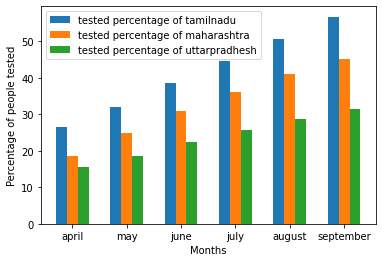

In [70]:
x=dt1["month"]
w=0.2
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,dt1["% of tested"],w,label="tested percentage of tamilnadu")
plt.bar(bar2,dt2["% of tested"],w,label="tested percentage of maharashtra")
plt.bar(bar3,dt3["% of tested"],w,label="tested percentage of uttarpradhesh")

plt.xlabel('Months')
plt.ylabel('Percentage of people tested')
plt.xticks(bar1+w,["april","may","june","july","august","september"])
plt.legend()
plt.show()